In [83]:
pip install tensorflow 


Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [87]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [88]:
import tensorflow as tf
import os

In [89]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [90]:
gpus

[]

In [91]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [92]:
tf.config.list_physical_devices('GPU')

[]

In [93]:
import cv2
import imghdr

In [94]:
data_dir = 'data' 

In [95]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [96]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


In [97]:
import numpy as np
from matplotlib import pyplot as plt

In [98]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 306 files belonging to 2 classes.


In [99]:
data_iterator = data.as_numpy_iterator()

In [100]:
batch = data_iterator.next()

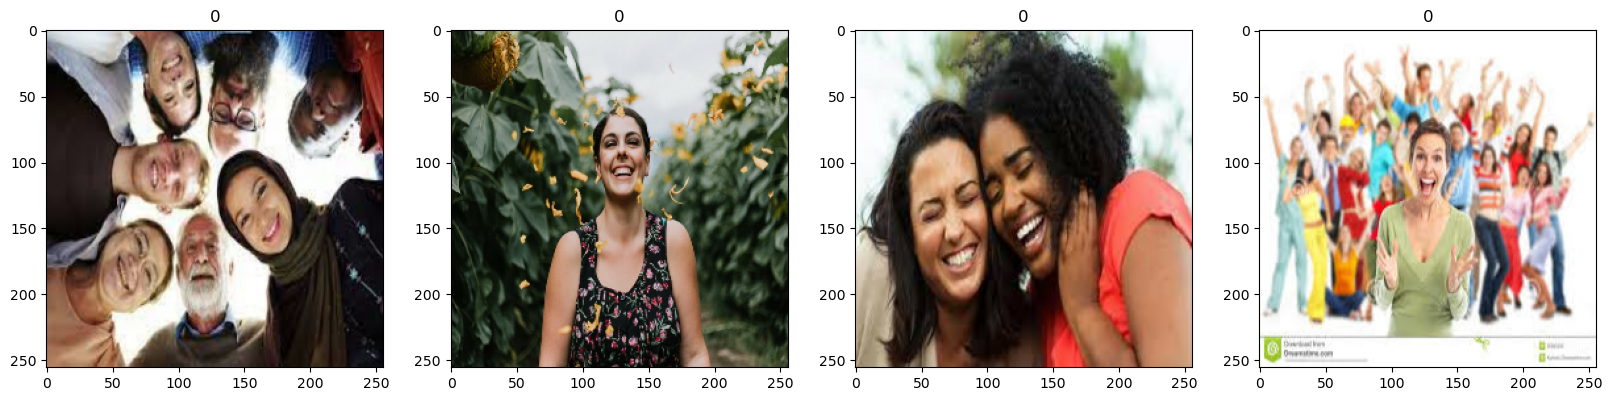

In [101]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [102]:
data = data.map(lambda x,y: (x/255, y))

In [103]:
data.as_numpy_iterator().next()

(array([[[[0.29946578, 0.30830175, 0.17382047],
          [0.27942708, 0.3043907 , 0.18480104],
          [0.22929305, 0.2769244 , 0.16172832],
          ...,
          [0.02310145, 0.08192497, 0.07016027],
          [0.01812194, 0.07694547, 0.06518076],
          [0.01420037, 0.0730239 , 0.06125919]],
 
         [[0.30923426, 0.3252451 , 0.19679266],
          [0.2799192 , 0.30991307, 0.18824391],
          [0.2355373 , 0.28759   , 0.17185776],
          ...,
          [0.00735103, 0.06600701, 0.0542423 ],
          [0.0106924 , 0.06951593, 0.05775123],
          [0.00730699, 0.06613051, 0.05436581]],
 
         [[0.2948941 , 0.32151788, 0.19953565],
          [0.25712317, 0.3009038 , 0.18276559],
          [0.23329408, 0.2921176 , 0.17782341],
          ...,
          [0.00730028, 0.05547066, 0.04721392],
          [0.00742953, 0.05572917, 0.04747242],
          [0.00742953, 0.05572917, 0.04747242]],
 
         ...,
 
         [[0.3534572 , 0.43893036, 0.18809263],
          [0.38080

In [104]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [105]:
train_size

7

In [106]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [107]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [109]:
model = Sequential()

In [110]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
logdir='logs'

In [114]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [115]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5024 - loss: 1.1174 - val_accuracy: 0.5156 - val_loss: 0.6608
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5274 - loss: 0.6559 - val_accuracy: 0.5938 - val_loss: 0.6216
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5818 - loss: 0.6054 - val_accuracy: 0.8281 - val_loss: 0.4760
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8345 - loss: 0.5002 - val_accuracy: 0.6719 - val_loss: 0.8298
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6874 - loss: 0.5798 - val_accuracy: 0.8906 - val_loss: 0.4002
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8685 - loss: 0.4166 - val_accuracy: 0.9062 - val_loss: 0.3364
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8638 - loss: 0.4346 - val_accuracy: 0.7500 - val_loss: 0.4742
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8267 - loss: 0.3957 - val_accuracy: 0.9531 - val_loss: 0.3241
Epoch 9/20


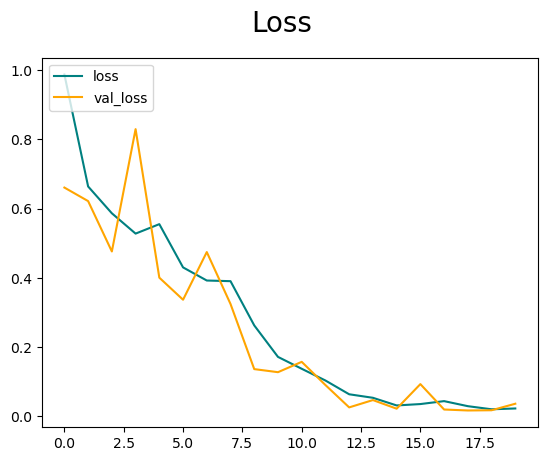

In [116]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

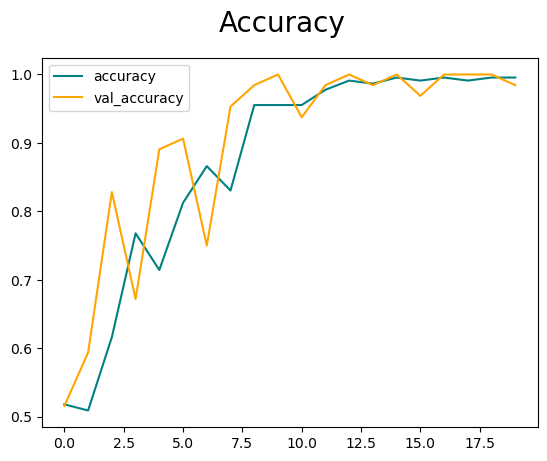

In [117]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [118]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [119]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [120]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


In [121]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [122]:
import cv2

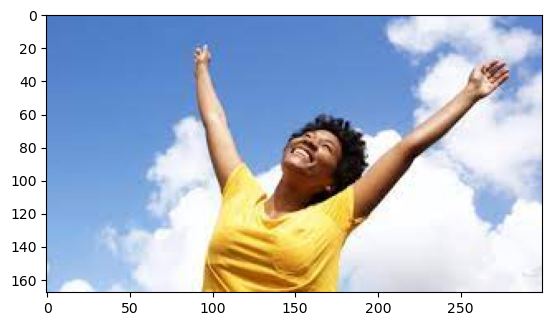

In [123]:
img = cv2.imread('download.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

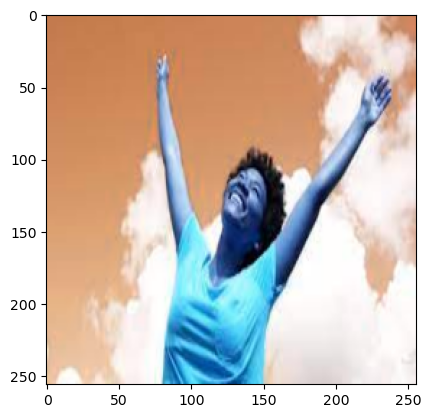

In [124]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [125]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [126]:
yhat

array([[0.4668446]], dtype=float32)

In [127]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [128]:
from tensorflow.keras.models import load_model

In [129]:
os.makedirs('models', exist_ok=True)
model.save(os.path.join('models','imageclassifier.keras'))

In [130]:
new_model = load_model(os.path.join('models', 'imageclassifier.keras'))

In [131]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


array([[0.4668446]], dtype=float32)